# Model Comparison

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
#set golbal path
global_path=os.path.abspath('.')
#load the needed file
df_all = pd.read_csv(global_path+'/data/inputdata.csv')
df_train = pd.read_csv(global_path+'/data/train_users_2.csv')
df_test = pd.read_csv(global_path+'/data/test_users.csv')

In [3]:
#get the needed parameter for model training and testing
label = df_train['country_destination']
#get the id of test
id_test = df_test['id']

# Build the Traing set ,Label and Test set

In [4]:
######Computing X, y and X_test ################
piv_train = len(label) #Marker to split df_all into train + test
vals = df_all.values
le = LabelEncoder()

X = vals[:piv_train]
y = le.fit_transform(label.values)
X_test = vals[piv_train:]

## Xgboost Model

### 0.87822 accuracy for Xgboost algorithm

In [5]:
#Classifier
xgb = XGBClassifier(max_depth=6, learning_rate=0.3, n_estimators=25,
                    objective='multi:softprob', subsample=0.5, colsample_bytree=0.5, seed=0)                  
bst = xgb.fit(X, y)
y_pred = bst.predict_proba(X_test)  

#Taking the 5 classes with highest probabilities
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()
#generate submit data frmae
sub_xgb = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub_xgb.to_csv('sub_xgb.csv',index=False)

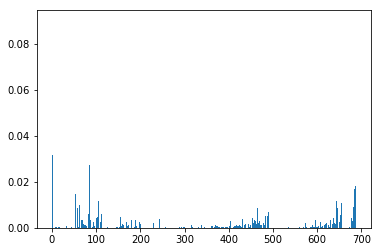

In [7]:
from matplotlib import pyplot
#plot feature importance
pyplot.bar(range(len(bst.feature_importances_)), bst.feature_importances_)
pyplot.show()

In [42]:
#feature importance plot
import pandas as pd
featureList = list(df_all.columns.values)
fscore = bst.booster().get_fscore()
importanceDict = {};
i=0;
for k, v in fscore.items():
    if i<=689:
        importanceDict[featureList[i]] = v
    i=i+1;
import operator
sorted_importanceDict = sorted(importanceDict.items(), key=operator.itemgetter(1))
#get 10 most important feature
sorted_importance_10 = list(sorted_importanceDict)[-10:][::-1]
#create dataframe
importance_df = pd.DataFrame.from_dict(sorted_importance_10, orient='columns', dtype=None)
#change column name
importance_df.columns= ['feature','weight']
#show dataframe
importance_df

,feature,weight
0,destination_km2_FR,976
1,distance_km_CA,343
2,language_levenshtein_distance_ES,294
3,lat_destination_PT,249
4,tfa_week,239
5,age_interval_30-34,195
6,language_th,182
7,distance_km_US,169
8,language_levenshtein_distance_CA,163
9,Unnamed: 0,160


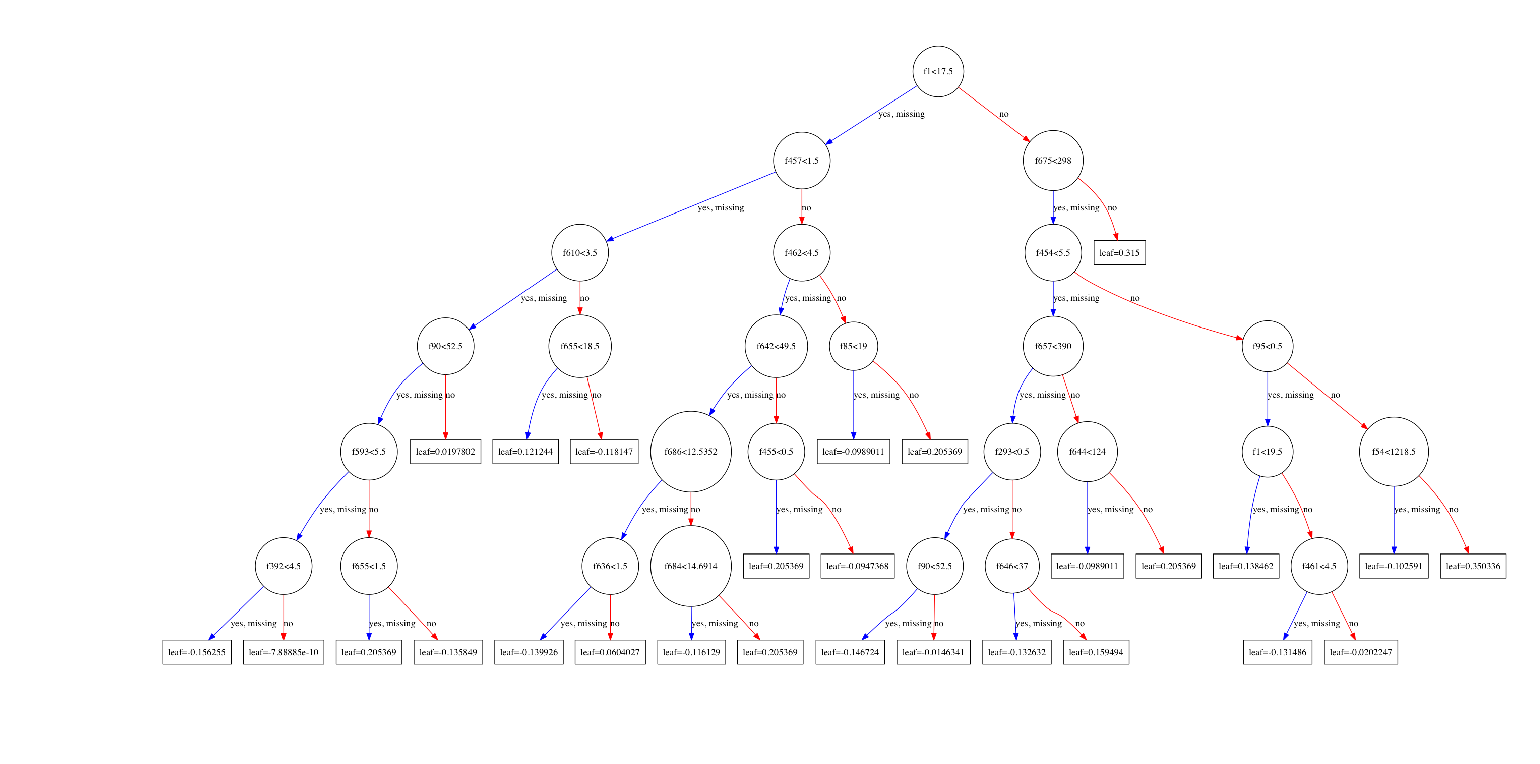

In [10]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 290
plot_tree(bst, num_trees=1)
plt.show()

## K-NN Model

### 0.80598 accuracy for K-NN algorithm

In [12]:
neigh = KNeighborsClassifier(n_neighbors=3)
Kmodel = neigh.fit(X, y) 
y_pred_knn = Kmodel.predict_proba(X_test)

#Taking the 5 classes with highest probabilities
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_pred_knn[i])[::-1])[:5].tolist()
#generate submit data frmae    
sub_knn = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
#save submit file
sub_knn.to_csv('sub_knn.csv',index=False)

## SVM Model

### 0.84679 accuracy for SVM algorithm

In [21]:
clf = svm.SVC()
svm_model = clf.fit(X, y)  
y_pred_svm = svm_model.predict_proba(X_test)

#Taking the 5 classes with highest probabilities
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_pred_svm[i])[::-1])[:5].tolist()
#generate submit data frmae    
sub_svm = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
#save submit file
sub.to_csv('sub_svm.csv',index=False)